In [1]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import numpy as np                               # vectors and matrices
import pandas as pd                              # tables and data manipulations
import matplotlib.pyplot as plt                  # plots
import seaborn as sns                            # more plots

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions
from tqdm import tqdm_notebook



%matplotlib inline

In [2]:
ads = pd.read_csv('ads.csv', index_col=['Time'], parse_dates=['Time'])

In [3]:
ads

,Ads
Time,
2017-09-13 00:00:00,80115
2017-09-13 01:00:00,79885
2017-09-13 02:00:00,89325
2017-09-13 03:00:00,101930
2017-09-13 04:00:00,121630
...,...
2017-09-21 19:00:00,155890
2017-09-21 20:00:00,123395
2017-09-21 21:00:00,103080


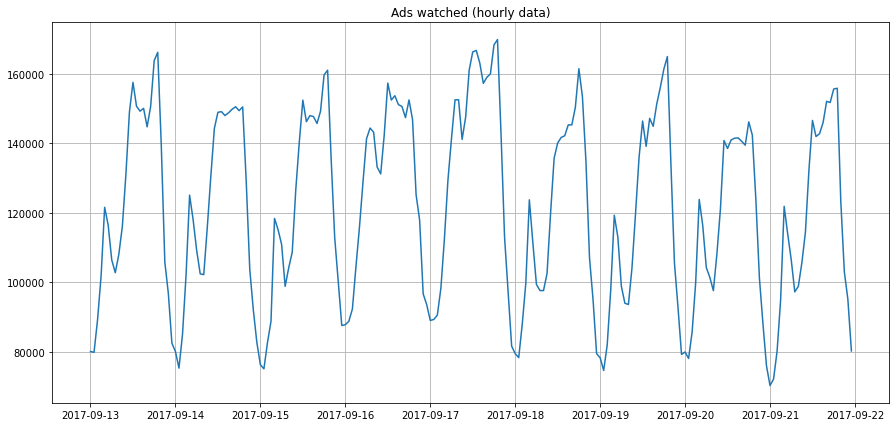

In [4]:
plt.figure(figsize=(15, 7))
plt.plot(ads.Ads)
plt.title('Ads watched (hourly data)')
plt.grid(True)
plt.show()

In [5]:
## Accuracy metrics

from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [6]:
def moving_average(series, n):
    """
        Calculate average of last n observations
    """
    return np.average(series[-n:])

In [7]:
def plotMovingAverage(series, window, scale=1.96):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

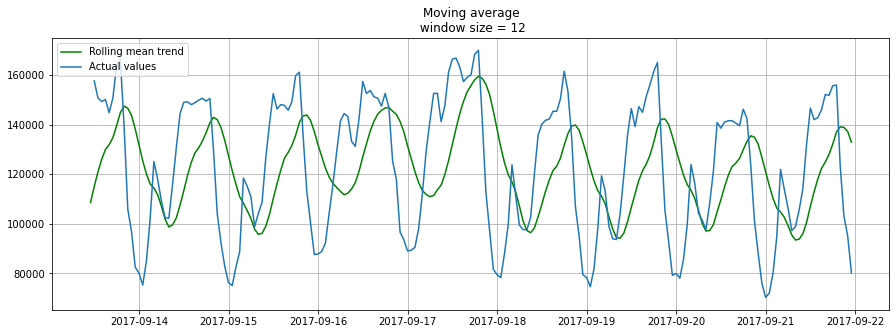

In [8]:
plotMovingAverage(ads,12) 

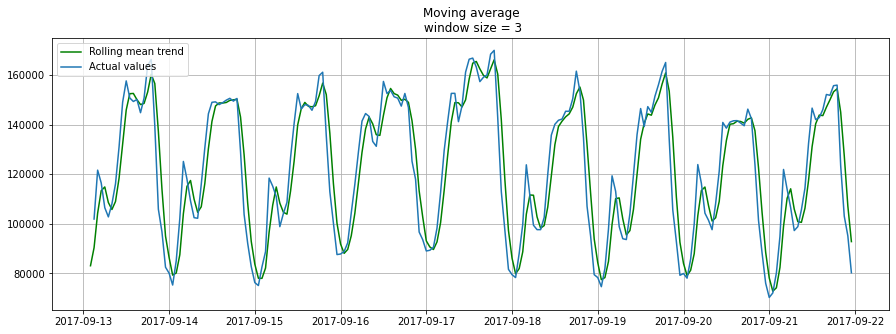

In [9]:
plotMovingAverage(ads, 3)

In [10]:
def exponential_smoothing(series, alpha):
    """
        series - dataset with timestamps
        alpha - float [0.0, 1.0], smoothing parameter
    """
    result = [series[0]] # first value is same as series
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [11]:
def plotExponentialSmoothing(series, alphas):
    """
        Plots exponential smoothing with different alphas
        
        series - dataset with timestamps
        alphas - list of floats, smoothing parameters
        
    """
    with plt.style.context('seaborn-white'):    
        plt.figure(figsize=(15, 7))
        for alpha in alphas:
            plt.plot(exponential_smoothing(series, alpha), label="Alpha {}".format(alpha))
        plt.plot(series.values, "c", label = "Actual")
        plt.legend(loc="best")
        plt.axis('tight')
        plt.title("Exponential Smoothing")
        plt.grid(True);

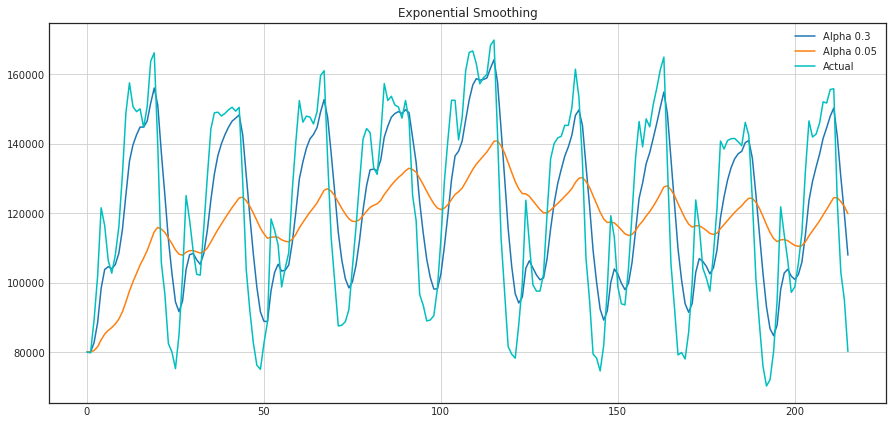

In [12]:
plotExponentialSmoothing(ads.Ads, [0.3, 0.05])

<Figure size 2520x720 with 0 Axes>

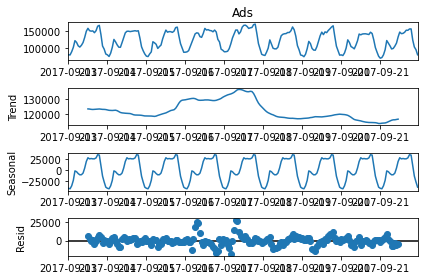

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose

result_ads = seasonal_decompose(ads.Ads, model='additive')  # model='multiplicative' also works
plt.figure(figsize = (35,10))
# plt.plot(result1.seasonal);
result_ads.plot();

In [14]:
result_ads_trend = result_ads.trend
# result_ads_trend = result_ads_trend.dropna()
result_ads_trend.head(20)

Time
2017-09-13 00:00:00              NaN
2017-09-13 01:00:00              NaN
2017-09-13 02:00:00              NaN
2017-09-13 03:00:00              NaN
2017-09-13 04:00:00              NaN
2017-09-13 05:00:00              NaN
2017-09-13 06:00:00              NaN
2017-09-13 07:00:00              NaN
2017-09-13 08:00:00              NaN
2017-09-13 09:00:00              NaN
2017-09-13 10:00:00              NaN
2017-09-13 11:00:00              NaN
2017-09-13 12:00:00    123368.541667
2017-09-13 13:00:00    123273.958333
2017-09-13 14:00:00    123091.250000
2017-09-13 15:00:00    123006.458333
2017-09-13 16:00:00    123082.604167
2017-09-13 17:00:00    123188.020833
2017-09-13 18:00:00    123277.291667
2017-09-13 19:00:00    123327.500000
Name: trend, dtype: float64

In [15]:
result_ads_seasonal = result_ads.seasonal

In [16]:
result_total_ads = result_ads.seasonal + result_ads.trend + result_ads.resid
result_total_ads

Time
2017-09-13 00:00:00   NaN
2017-09-13 01:00:00   NaN
2017-09-13 02:00:00   NaN
2017-09-13 03:00:00   NaN
2017-09-13 04:00:00   NaN
                       ..
2017-09-21 19:00:00   NaN
2017-09-21 20:00:00   NaN
2017-09-21 21:00:00   NaN
2017-09-21 22:00:00   NaN
2017-09-21 23:00:00   NaN
Length: 216, dtype: float64

In [17]:
ads.Ads

Time
2017-09-13 00:00:00     80115
2017-09-13 01:00:00     79885
2017-09-13 02:00:00     89325
2017-09-13 03:00:00    101930
2017-09-13 04:00:00    121630
                        ...  
2017-09-21 19:00:00    155890
2017-09-21 20:00:00    123395
2017-09-21 21:00:00    103080
2017-09-21 22:00:00     95155
2017-09-21 23:00:00     80285
Name: Ads, Length: 216, dtype: int64

In [18]:
series = ads.Ads  - result_ads.seasonal -result_ads.trend

In [19]:
series = series.dropna()
series

Time
2017-09-13 12:00:00    5777.732205
2017-09-13 13:00:00    1522.328559
2017-09-13 14:00:00    -495.757378
2017-09-13 15:00:00    1123.318142
2017-09-13 16:00:00   -4333.413628
                          ...     
2017-09-21 07:00:00   -7917.463108
2017-09-21 08:00:00   -6853.582899
2017-09-21 09:00:00   -3833.530816
2017-09-21 10:00:00   -6752.072483
2017-09-21 11:00:00   -4290.874566
Length: 192, dtype: float64

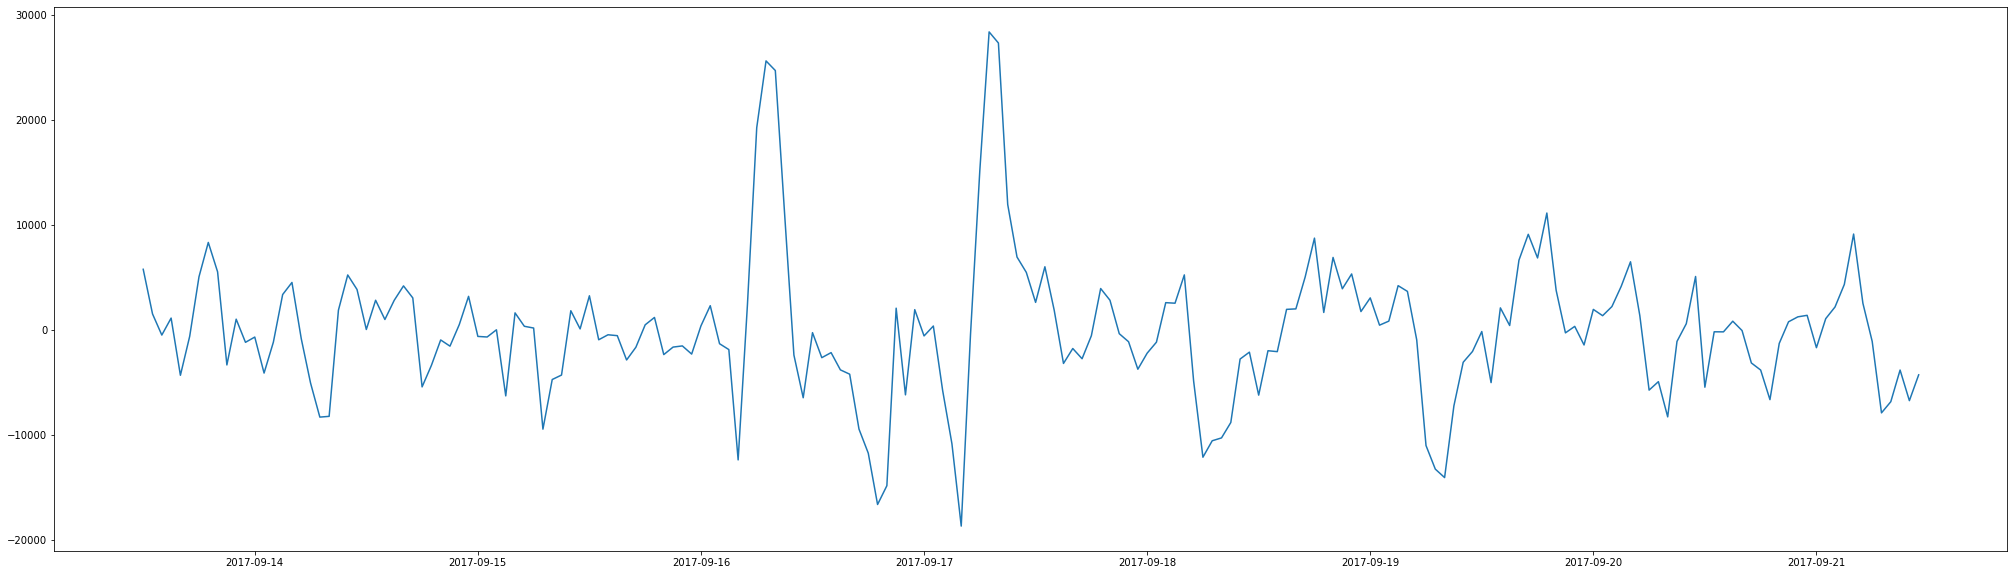

In [20]:
plt.figure(figsize = (35,10))
plt.plot(series)

In [38]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

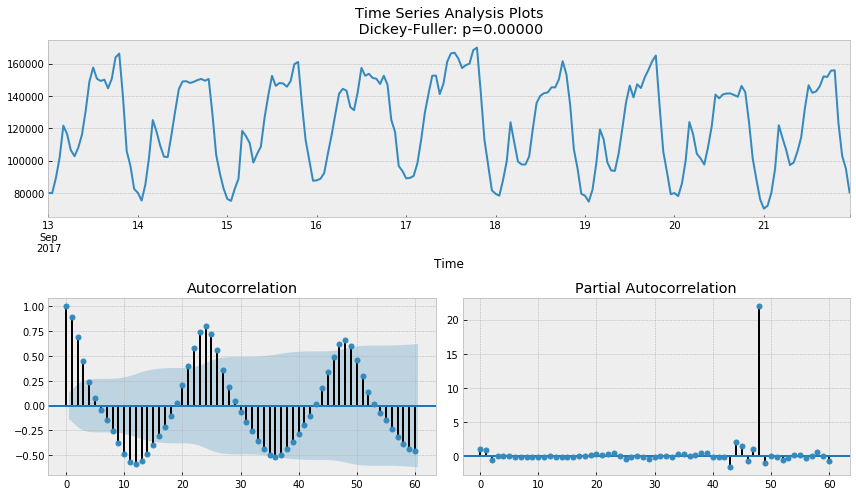

In [42]:
tsplot(ads.Ads, lags=60)

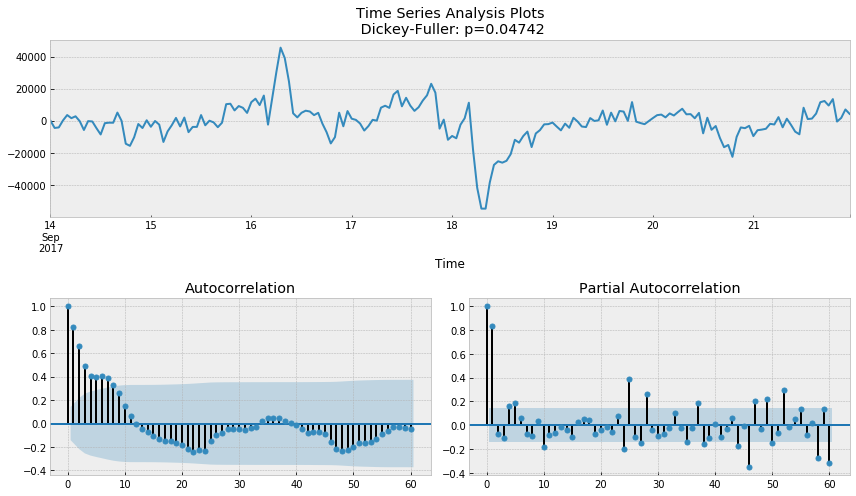

In [43]:
ads_diff = ads.Ads - ads.Ads.shift(24)
tsplot(ads_diff[24:], lags=60)


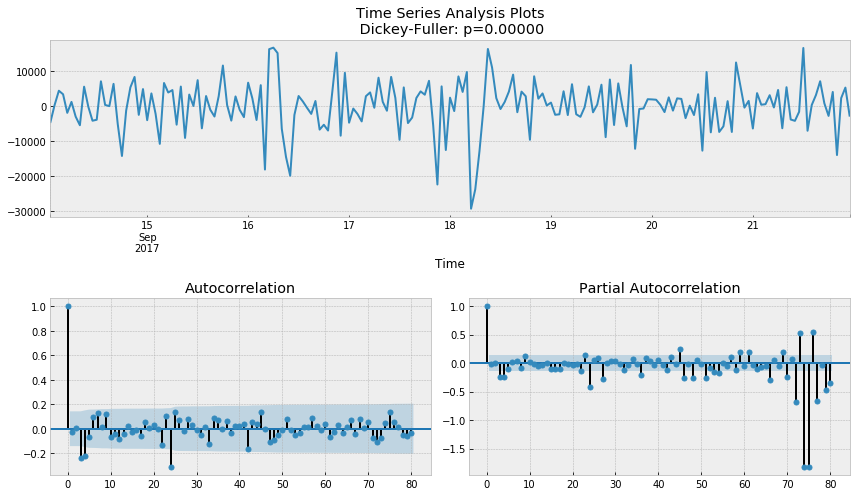

In [46]:
ads_diff1 = ads_diff - ads_diff.shift(1)
tsplot(ads_diff1[24+1:], lags=80)


In [47]:
ads_diff1

Time
2017-09-13 00:00:00        NaN
2017-09-13 01:00:00        NaN
2017-09-13 02:00:00        NaN
2017-09-13 03:00:00        NaN
2017-09-13 04:00:00        NaN
                        ...   
2017-09-21 19:00:00     4015.0
2017-09-21 20:00:00   -14015.0
2017-09-21 21:00:00     2270.0
2017-09-21 22:00:00     5265.0
2017-09-21 23:00:00    -2750.0
Name: Ads, Length: 216, dtype: float64

In [49]:
# setting initial values and some bounds for them
ps = range(2, 5)
d=1 
qs = range(2, 5)
Ps = range(1, 3)
D=1 
Qs = range(0, 2)
s = 24 # season length is still 24

# creating list with all the possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

36

In [50]:
def optimizeSARIMA(parameters_list, d, D, s):
    """
        Return dataframe with parameters and corresponding AIC
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order in ARIMA model
        D - seasonal integration order 
        s - length of season
    """
    
    results = []
    best_aic = float("inf")

    for param in tqdm_notebook(parameters_list):
        # we need try-except because on some combinations model fails to converge
        try:
            model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(param[0], d, param[1]), 
                                            seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            continue
        aic = model.aic
        # saving best model, AIC and parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        results.append([param, model.aic])

    result_table = pd.DataFrame(results)
    result_table.columns = ['parameters', 'aic']
    # sorting in ascending order, the lower AIC is - the better
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    return result_table

In [51]:
%%time
# parameters_list = [(4,4,2,1)]
result_table1 = optimizeSARIMA(parameters_list, d, D, s)

/Users/parasahuja/anaconda3/envs/transwork/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/parasahuja/anaconda3/envs/transwork/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/parasahuja/anaconda3/envs/transwork/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/parasahuja/anaconda3/envs/transwork/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/parasahuja/anaconda3/envs/transwork/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_mode

/Users/parasahuja/anaconda3/envs/transwork/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/parasahuja/anaconda3/envs/transwork/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/parasahuja/anaconda3/envs/transwork/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/parasahuja/anaconda3/envs/transwork/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/parasahuja/anaconda3/envs/transwork/lib/python3.6/site-packages/statsmodels/base/model.py:568

/Users/parasahuja/anaconda3/envs/transwork/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/Users/parasahuja/anaconda3/envs/transwork/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/parasahuja/anaconda3/envs/transwork/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/parasahuja/anaconda3/envs/transwork/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



CPU times: user 17min 19s, sys: 2min 50s, total: 20min 10s
Wall time: 3min 27s


In [52]:
result_table1

,parameters,aic
0,"(2, 3, 1, 1)",3888.642174
1,"(3, 2, 1, 1)",3888.763568
2,"(3, 2, 2, 1)",3889.705536
3,"(2, 3, 2, 1)",3889.717128
4,"(4, 2, 1, 1)",3890.279740
5,"(3, 3, 1, 1)",3890.513196
6,"(4, 2, 2, 1)",3891.321956
7,"(3, 3, 2, 1)",3891.504900
8,"(2, 4, 1, 1)",3892.302849
9,"(4, 3, 1, 1)",3892.322802


In [ ]:
result_table.head(35)

In [ ]:
# !pip install pmdarima

In [53]:
from pmdarima import auto_arima

In [54]:
stepwise_fit = auto_arima(ads.Ads,seasonal=True,m=24,start_p=0, start_q=0, max_p=5,  max_q=5,max_d=2,
                          trace=False,n_jobs=-1)

In [55]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  216
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 24)   Log Likelihood               -2235.980
Date:                              Wed, 21 Apr 2021   AIC                           4481.961
Time:                                      10:09:59   BIC                           4498.837
Sample:                                           0   HQIC                          4488.779
                                              - 216                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.139e+04   2326.895      4.896      0.000    6832.841     1.6e+04
ar.L1          0.7315      0.031     23.632      0.000       0.671       0.792
ar.S.L24       0.6654      0.056     11.886      0.000       0.556       0.775
ma.S.L24       0.1194      0.099      1.212      0.226      -0.074       0.312
sigma2      5.266e+07      0.319   1.65e+08      0.000    5.27e+07    5.27e+07
===================================================================================
Ljung-Box (L1) (Q):                  23.93   Jarque-Bera (JB):                 9.82
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               0.76   Skew:                            -0.28
Prob(H) (two-sided):                  0.25   Kurtosis:                         3.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.92e+23. Standard errors may be unstable.
"""

In [56]:
best_model1=sm.tsa.statespace.SARIMAX(ads.Ads, order=(1, 0, 0), 
                                        seasonal_order=(1, 0, 0, 24)).fit(disp=-1)
print(best_model1.summary())

/Users/parasahuja/anaconda3/envs/transwork/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/parasahuja/anaconda3/envs/transwork/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                                Ads   No. Observations:                  216
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 24)   Log Likelihood               -2274.338
Date:                            Wed, 21 Apr 2021   AIC                           4554.675
Time:                                    10:10:46   BIC                           4564.801
Sample:                                09-13-2017   HQIC                          4558.766
                                     - 09-21-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9748      0.026     37.241      0.000       0.923       1.026
ar.S.L24       0.7378      0.088   

In [58]:
result_table1.parameters[1]

(3, 2, 1, 1)

In [60]:
# set the parameters that give the lowest AIC
p, q, P, Q = result_table1.parameters[0]

best_model=sm.tsa.statespace.SARIMAX(ads.Ads, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)
print(best_model.summary())

/Users/parasahuja/anaconda3/envs/transwork/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
/Users/parasahuja/anaconda3/envs/transwork/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                       
Dep. Variable:                                  Ads   No. Observations:                  216
Model:             SARIMAX(2, 1, 3)x(1, 1, [1], 24)   Log Likelihood               -1936.321
Date:                              Wed, 21 Apr 2021   AIC                           3888.642
Time:                                      10:11:22   BIC                           3914.660
Sample:                                  09-13-2017   HQIC                          3899.181
                                       - 09-21-2017                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7913      0.270      2.928      0.003       0.262       1.321
ar.L2         -0.55

In [62]:
def plotSARIMA(series, model, n_steps):
    """
        Plots model vs predicted values
        
        series - dataset with timeseries
        model - fitted SARIMA model
        n_steps - number of steps to predict in the future
        
    """
    # adding model values
    data = series.copy()
    data.columns = ['actual']
    data['arima_model'] = model.fittedvalues
    # making a shift on s+d steps, because these values were unobserved by the model
    # due to the differentiating
    data['arima_model'][:s+d] = np.NaN
    
    # forecasting on n_steps forward 
    forecast = model.predict(start = data.shape[0], end = data.shape[0]+n_steps)
    forecast = data.arima_model.append(forecast)
    # calculate error, again having shifted on s+d steps from the beginning
    error = mean_absolute_percentage_error(data['actual'][s+d:], data['arima_model'][s+d:])

    plt.figure(figsize=(15, 7))
    plt.title("Mean Absolute Percentage Error: {0:.2f}%".format(error))
    plt.plot(forecast, color='r', label="model")
    plt.axvspan(data.index[-1], forecast.index[-1], alpha=0.5, color='lightgrey')
    plt.plot(data.actual, label="actual")
    plt.legend()
    plt.grid(True);

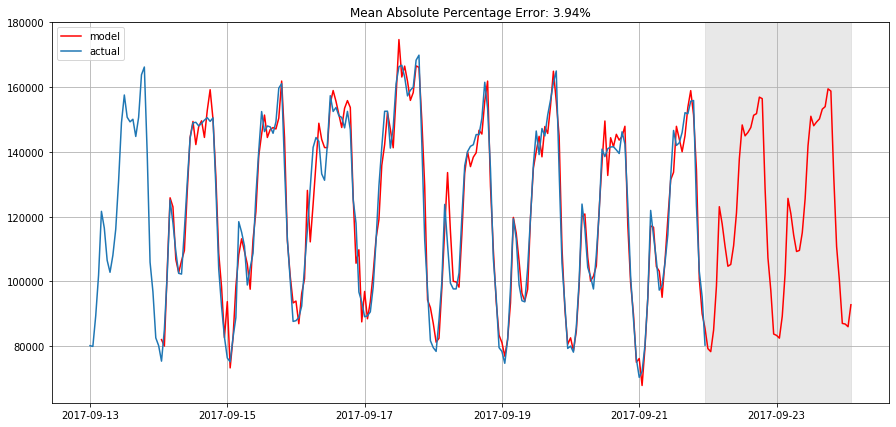

In [67]:
plotSARIMA(ads, best_model, 50)